In [28]:
import pennylane as qml
import tensorflow as tf
import numpy as np
import cv2 as cv
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

In [2]:
import random
class BeeComplex:
    def __init__(self, num_params, R):
        self.solution = [0 for i in range(num_params)]
        self.trial = 0
        for i in range(num_params):
            theta = random.random() * 2 * np.pi
            self.solution[i] = R * random.random() * complex(np.cos(theta), np.sin(theta))

    def evaluate(self, objective_func):
        self.fitness = objective_func(np.array(self.solution))

class ABCComplex:
    def __init__(self, objective_func, num_bees, num_params, num_trials, R):
        self.objective_func = objective_func
        self.num_bees = num_bees
        self.num_params = num_params
        self.num_trials = num_trials
        self.R = R
        self.best_solution = [0 for i in range(num_params)]
        self.best_fitness = float('inf')
        self.swarm = [BeeComplex(num_params, R) for i in range(num_bees)]

    def optimize(self):
        for i in range(self.num_trials):
            for j in range(self.num_bees):
                self.swarm[j].evaluate(self.objective_func)
                if self.swarm[j].fitness < self.best_fitness:
                    self.best_solution = self.swarm[j].solution
                    self.best_fitness = self.swarm[j].fitness
            for j in range(self.num_bees):
                k = random.randint(0, self.num_bees - 1)
                while k == j:
                    k = random.randint(0, self.num_bees - 1)
                phi = random.random() * 2 - 1
                new_solution = [0 for i in range(self.num_params)]
                for m in range(self.num_params):
                    new_solution[m] = self.swarm[j].solution[m] + \
                        phi * (self.swarm[j].solution[m] - self.swarm[k].solution[m])
                    if np.abs(new_solution[m]) > self.R:
                        theta = random.random() * 2 * np.pi
                        new_solution[m] = self.R * random.random() * complex(np.cos(theta), np.sin(theta))
                new_bee = BeeComplex(self.num_params, self.R)
                new_bee.solution = new_solution
                new_bee.evaluate(self.objective_func)
                if new_bee.fitness < self.swarm[j].fitness:
                    self.swarm[j].solution = new_solution
                    self.swarm[j].fitness = new_bee.fitness
                    self.swarm[j].trial = 0
                else:
                    self.swarm[j].trial += 1
            for j in range(self.num_bees):
                if self.swarm[j].trial > self.num_trials:
                    self.swarm[j] = Bee(self.num_params, self.R)
        return self.best_solution, self.best_fitness

In [189]:
import random

class Bee:
    def __init__(self, num_params, lower_limits, upper_limits):
        self.solution = [0 for i in range(num_params)]
        self.trial = 0
        for i in range(num_params):
            self.solution[i] = lower_limits[i] + \
                (upper_limits[i] - lower_limits[i]) * random.random()

    def evaluate(self, objective_func):
        self.fitness = objective_func(self.solution)

class ABC:
    def __init__(self, objective_func, num_bees, num_params, num_trials,
                 lower_limits, upper_limits):
        self.objective_func = objective_func
        self.num_bees = num_bees
        self.num_params = num_params
        self.num_trials = num_trials
        self.lower_limits = lower_limits
        self.upper_limits = upper_limits
        self.best_solution = [0 for i in range(num_params)]
        self.best_fitness = float('inf')
        self.swarm = [Bee(num_params, lower_limits, upper_limits)
                      for i in range(num_bees)]

    def optimize(self):
        for i in range(self.num_trials):
            for j in range(self.num_bees):
                self.swarm[j].evaluate(self.objective_func)
                if self.swarm[j].fitness < self.best_fitness:
                    self.best_solution = self.swarm[j].solution
                    self.best_fitness = self.swarm[j].fitness
            for j in range(self.num_bees):
                k = random.randint(0, self.num_bees - 1)
                while k == j:
                    k = random.randint(0, self.num_bees - 1)
                phi = random.random() * 2 - 1
                new_solution = [0 for i in range(self.num_params)]
                for m in range(self.num_params):
                    new_solution[m] = self.swarm[j].solution[m] + \
                        phi * (self.swarm[j].solution[m] - self.swarm[k].solution[m])
                    if new_solution[m] < self.lower_limits[m]:
                        new_solution[m] = self.lower_limits[m]
                    if new_solution[m] > self.upper_limits[m]:
                        new_solution[m] = self.upper_limits[m]
                new_bee = Bee(self.num_params, self.lower_limits, self.upper_limits)
                new_bee.solution = new_solution
                new_bee.evaluate(self.objective_func)
                if new_bee.fitness < self.swarm[j].fitness:
                    self.swarm[j].solution = new_solution
                    self.swarm[j].fitness = new_bee.fitness
                    self.swarm[j].trial = 0
                else:
                    self.swarm[j].trial += 1
            for j in range(self.num_bees):
                if self.swarm[j].trial > self.num_trials:
                    self.swarm[j] = Bee(self.num_params, self.lower_limits, self.upper_limits)
        return self.best_solution, self.best_fitness

In [174]:
data = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [175]:
(x_train, y_train), (x_test, y_test) = data

In [176]:
fives_train, f_train = x_train[y_train == 5], y_train[y_train == 5]
five_train_index = np.random.choice(fives_train.shape[0], 500)
fives_train = fives_train[five_train_index]
f_train = f_train[five_train_index]

fives_test, f_test = x_test[y_test == 5], y_test[y_test == 5]
five_test_index = np.random.choice(fives_test.shape[0], 250)
fives_test = fives_test[five_test_index]
f_test = f_test[five_test_index]

In [177]:
ones_train, o_train = x_train[y_train == 1], y_train[y_train == 1]
ones_train_index = np.random.choice(ones_train.shape[0], 500)
ones_train = ones_train[ones_train_index]
o_train = o_train[ones_train_index]

ones_test, o_test = x_test[y_test == 1], y_test[y_test == 1]
ones_test_index = np.random.choice(ones_test.shape[0], 250)
ones_test = ones_test[ones_test_index]
o_test = o_test[ones_test_index]

In [178]:
train, test = np.vstack((fives_train, ones_train)), np.vstack((fives_test, ones_test))
target_train, target_test = np.hstack((f_train, o_train)), np.hstack((f_test, o_test))

In [179]:
set_train, t_train = shuffle(train, target_train, random_state=0)
set_test, t_test = shuffle(test, target_test, random_state=0)

In [180]:
t_train = t_train.astype(np.int64)
t_test = t_test.astype(np.int64)

In [181]:
t_train[t_train == 1] = -1
t_train[t_train == 5] = 1
t_test[t_test == 1] = -1
t_test[t_test == 5] = 1

In [182]:
train_norm = []
for img in set_train:
    img_resize = cv.resize(img, (16, 15), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    img_reshape = img_norm.reshape((240,))
    norm = np.linalg.norm(img_reshape)
    train_norm.append(img_reshape / norm)
train_norm = np.array(train_norm)

In [183]:
test_norm = []
for img in set_test:
    img_resize = cv.resize(img, (16, 15), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    img_reshape = img_norm.reshape((240,))
    norm = np.linalg.norm(img_reshape)
    test_norm.append(img_reshape / norm)
test_norm = np.array(test_norm)

In [82]:
theta = np.array([ 0.12788314,  0.11049123,  0.01782979, -0.62406689, -0.82300405, -0.7072459 , -0.18811705, -1., -0.87250477, -0.2984953, -0.75411278, -0.80998809,  0.02397165, -0.21513785, -0.10053772])

In [171]:
QUBITS = range(6)
dev = qml.device('default.qubit', wires=4)

In [216]:
@qml.qnode(device=dev)
def quantum_feature_map_su(img, theta):
    param = np.hstack((img, theta))
    qml.SpecialUnitary(param, wires=[0,1,2,3])
    return qml.state()
    # return qml.expval(qml.PauliZ(3))

In [194]:
def cost(theta):
    N = train.shape[0]
    expvals = np.array([quantum_feature_map_su(img, theta) for img in train_norm])
    return 1/N * np.sum(np.power(expvals - t_train, 2))

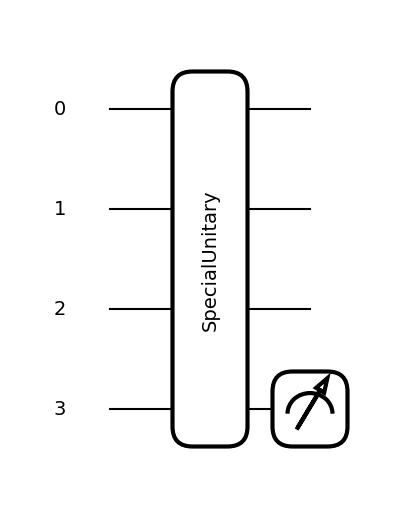

In [195]:
fig, ax = qml.draw_mpl(quantum_feature_map_su)(train_norm[0], np.zeros((15,)))
plt.show()

In [196]:
abc = ABC(cost, 30, 15, 30, [-2]*15, [2]*15)

In [197]:
%%time
abc.optimize()

CPU times: user 8h 32min 57s, sys: 18min 19s, total: 8h 51min 17s
Wall time: 2h 13min 58s


([-0.1322634598770141,
  0.31779562846303605,
  0.009132915834792421,
  -0.07732433453106238,
  0.7120244892028535,
  0.19504245476363957,
  0.40594054296573545,
  -0.07209333675619088,
  0.6465591599111713,
  -0.6929973312546462,
  0.6598888709997305,
  -0.027278507244861645,
  -1.11566008931607,
  -0.620043070895417,
  -0.6210195318955125],
 0.7104403326320367)

In [264]:
np.save('models/quantum_feature_map_su.npy', abc.best_solution)

In [198]:
result_predict = []
for i in test_norm:
    result_predict.append(1 if quantum_feature_map_su(i, abc.best_solution) > 0 else -1)

In [199]:
print_result(t_test, result_predict)

Accuracy: 0.82
Recall: 0.936
Precision: 0.7597402597402597
F1-score: 0.8387096774193549


In [202]:
theta_feature_map = abc.best_solution

In [217]:
state_vector_train = np.array([quantum_feature_map_su(img, theta_feature_map) for img in train_norm])

In [218]:
state_vector_test = np.array([quantum_feature_map_su(img, theta_feature_map) for img in test_norm])

In [228]:
state_vector_train.shape

(1000, 16)

In [223]:
def line(x, w):
    return np.dot(w[1:],x) + w[0]

In [224]:
def objective_func(w):
    res = []
    for x, y in zip(state_vector_train, t_train):
        f = line(x, w)
        value = 1 - y * (f.real + f.imag)
        if value > 0:
            res.append(value)
        else:
            res.append(0)
    return np.sum(res)

In [229]:
objective_func(np.ones((17,)))

616.9293286252778

In [230]:
abc_complex = ABCComplex(objective_func, 500, 17, 250, 2)

In [231]:
%%time
abc_complex.optimize()

CPU times: user 11min 35s, sys: 153 ms, total: 11min 35s
Wall time: 11min 39s


([(-0.10071127752645712-0.9335239995944032j),
  (-1.5003121643319504-0.9355749731919994j),
  (0.3339674355070743+1.536262408350523j),
  (-0.8577193836565873-1.5662728382052908j),
  (-0.6135246563694966-1.5117629791852376j),
  (-0.22796686799400162+1.383503074129844j),
  (1.643599480250788+0.06824603573934654j),
  (-0.762150037777972+1.1050132304010478j),
  (-0.627482356870289-1.5933332599721834j),
  (-0.5406516104563872+1.898197878093945j),
  (1.790140462725234+0.8320929501828291j),
  (1.0523295783270508+1.628525156642082j),
  (-0.4738168973678674-0.44751252657142976j),
  (0.02888665856103593+1.0359800335008036j),
  (1.7708457350709077+0.007112280460712016j),
  (-1.0046678646471945-0.7961964810408673j),
  (1.7350296425506484-0.6044200311851465j)],
 105.34936282204733)

In [233]:
def predict(X, w):
    res = []
    for x, y in zip(X, t_train):
        f = line(x, w)
        value = f.real + f.imag
        # res.append(value)
        if value > 0:
            res.append(1)
        elif value < 0:
            res.append(-1)
    return res

In [234]:
y_pred = predict(state_vector_train, abc_complex.best_solution )

In [235]:
y_pred_test = predict(state_vector_test, abc_complex.best_solution )

In [236]:
def print_result(y_target, y_predict):
    print(f'Accuracy: {accuracy_score(y_target, y_predict)}')
    print(f'Recall: {recall_score(y_target, y_predict)}')
    print(f'Precision: {precision_score(y_target, y_predict)}')
    print(f'F1-score: {f1_score(y_target, y_predict)}')

In [237]:
print_result(t_train, y_pred)

Accuracy: 0.969
Recall: 0.972
Precision: 0.9662027833001988
F1-score: 0.9690927218344965


In [238]:
print_result(t_test, y_pred_test)

Accuracy: 0.968
Recall: 0.984
Precision: 0.9534883720930233
F1-score: 0.9685039370078741


In [266]:
abc_complex.best_solution

[(-0.10071127752645712-0.9335239995944032j),
 (-1.5003121643319504-0.9355749731919994j),
 (0.3339674355070743+1.536262408350523j),
 (-0.8577193836565873-1.5662728382052908j),
 (-0.6135246563694966-1.5117629791852376j),
 (-0.22796686799400162+1.383503074129844j),
 (1.643599480250788+0.06824603573934654j),
 (-0.762150037777972+1.1050132304010478j),
 (-0.627482356870289-1.5933332599721834j),
 (-0.5406516104563872+1.898197878093945j),
 (1.790140462725234+0.8320929501828291j),
 (1.0523295783270508+1.628525156642082j),
 (-0.4738168973678674-0.44751252657142976j),
 (0.02888665856103593+1.0359800335008036j),
 (1.7708457350709077+0.007112280460712016j),
 (-1.0046678646471945-0.7961964810408673j),
 (1.7350296425506484-0.6044200311851465j)]

In [267]:
np.save('models/qsvm_with_quantum_feature_map_su.npy', abc_complex.best_solution)

In [278]:
one1 = 255 - cv.imread('/home/petro/Pictures/test/five1.png', cv.IMREAD_GRAYSCALE)

In [280]:
one1[one1==175] = 0

In [274]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

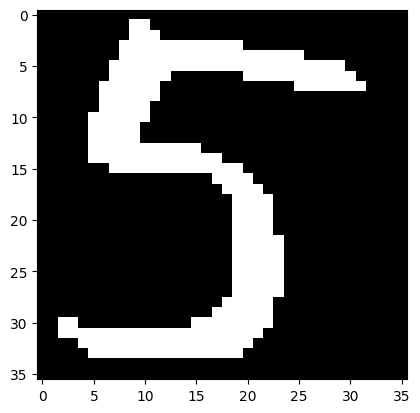

In [281]:
plt.imshow(one1, cmap='gray')

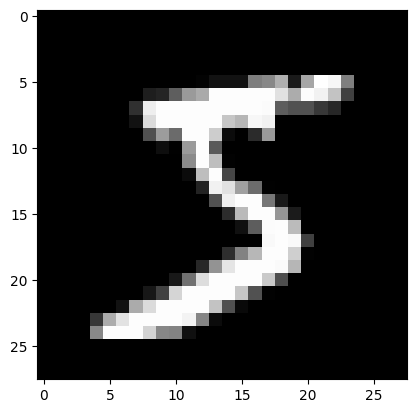

In [275]:
plt.imshow(x_train[0], cmap='gray')

In [270]:
train_norm = []
one1_resize = cv.resize(255-one1, (16, 15), interpolation=cv.INTER_LINEAR)
one1_norm = cv.normalize(one1_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
one1_reshape =one1_norm.reshape((240,))
norm = np.linalg.norm(one1_reshape)
train_norm.append(one1_reshape / norm)
train_norm = np.array(train_norm)

In [271]:
convert_train = quantum_feature_map_su(train_norm[0], theta_feature_map)

In [272]:
predict([convert_train], abc_complex.best_solution)

[-1]

# QCNN

In [120]:
data = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [121]:
(x_train, y_train), (x_test, y_test) = data

In [122]:
fives_train, f_train = x_train[y_train == 5], y_train[y_train == 5]
five_train_index = np.random.choice(fives_train.shape[0], 500)
fives_train = fives_train[five_train_index]
f_train = f_train[five_train_index]

fives_test, f_test = x_test[y_test == 5], y_test[y_test == 5]
five_test_index = np.random.choice(fives_test.shape[0], 250)
fives_test = fives_test[five_test_index]
f_test = f_test[five_test_index]

In [123]:
ones_train, o_train = x_train[y_train == 1], y_train[y_train == 1]
ones_train_index = np.random.choice(ones_train.shape[0], 500)
ones_train = ones_train[ones_train_index]
o_train = o_train[ones_train_index]

ones_test, o_test = x_test[y_test == 1], y_test[y_test == 1]
ones_test_index = np.random.choice(ones_test.shape[0], 250)
ones_test = ones_test[ones_test_index]
o_test = o_test[ones_test_index]

In [124]:
train, test = np.vstack((fives_train, ones_train)), np.vstack((fives_test, ones_test))
target_train, target_test = np.hstack((f_train, o_train)), np.hstack((f_test, o_test))

In [125]:
set_train, t_train = shuffle(train, target_train, random_state=0)
set_test, t_test = shuffle(test, target_test, random_state=0)

In [126]:
t_train = t_train.astype(np.int64)
t_test = t_test.astype(np.int64)

In [127]:
target_train_categorical = np.zeros((t_train.shape[0], 2))
target_test_categorical = np.zeros((t_test.shape[0], 2))

In [128]:
target_train_categorical[t_train == 1] = [1, 0]
target_train_categorical[t_train == 5] = [0, 1]

target_test_categorical[t_test == 1] = [1, 0]
target_test_categorical[t_test == 5] = [0, 1]

In [129]:
train_norm = []
for img in set_train:
    img_resize = cv.resize(img, (16, 16), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    train_norm.append(img_norm)
train_norm = np.array(train_norm)

In [130]:
test_norm = []
for img in set_test:
    img_resize = cv.resize(img, (16, 16), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    test_norm.append(img_norm)
test_norm = np.array(test_norm)

In [131]:
train_img_vector = train_norm.reshape((-1, 256))
test_img_vector = test_norm.reshape((-1, 256))

In [132]:
train_norm_8 = []
for img in set_train:
    img_resize = cv.resize(img, (8, 8), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    train_norm_8.append(img_norm)
train_norm_8 = np.array(train_norm_8).astype(np.float64)

In [133]:
test_norm_8 = []
for img in set_test:
    img_resize = cv.resize(img, (8, 8), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    test_norm_8.append(img_norm)
test_norm_8 = np.array(test_norm_8).astype(np.float64)

In [134]:
train_img_vector_8 = train_norm_8.reshape((-1, 64))
test_img_vector_8 = test_norm_8.reshape((-1, 64))

In [34]:
def amplitude_embedding(features, quants):
    qml.AmplitudeEmbedding(features=features, wires=quants, normalize=True)

In [35]:
def q_conv_circuit_1(theta, quants):
    qml.RY(theta[0], wires=quants[0])
    qml.RY(theta[1], wires=quants[1])
    qml.CNOT(wires=quants)

In [36]:
def q_conv_circuit_2(theta, quants):
    qml.Hadamard(wires=quants[0])
    qml.Hadamard(wires=quants[0])
    qml.CZ(wires=quants)
    qml.CRX(theta[0], wires=quants[0])
    qml.CRX(theta[1], wires=quants[1])

In [37]:
def q_conv_circuit_3(theta, quants):
    qml.RY(theta[0], wires=quants[0])
    qml.RY(theta[1], wires=quants[1])
    qml.CNOT(wires=(quants[1], quants[0]))
    qml.RY(theta[2], wires=quants[0])
    qml.RY(theta[3], wires=quants[1])
    qml.CNOT(wires=quants)

In [38]:
def q_conv_circuit_4(theta, quants):
    qml.RY(theta[0], wires=quants[0])
    qml.RY(theta[1], wires=quants[1])
    qml.CNOT(wires=quants)
    qml.CNOT(wires=[quants[1], quants[0]])

In [39]:
def q_conv_circuit_5(theta, quants):
    qml.RY(theta[0], wires=quants[0])
    qml.RY(theta[1], wires=quants[1])
    qml.RY(theta[2], wires=quants[2])
    qml.Toffoli(wires=quants)
    qml.Toffoli(wires=[quants[0], quants[2], quants[1]])
    qml.Toffoli(wires=[quants[2], quants[1], quants[0]])

In [40]:
def q_conv_circuit_6(theta, quants):
    qml.SpecialUnitary([theta[0], theta[1], theta[2]], wires=quants[0])
    qml.SpecialUnitary([theta[3], theta[4], theta[5]], wires=quants[1])
    qml.CNOT(wires=quants)
    qml.CNOT(wires=[quants[1], quants[0]])

In [41]:
def q_conv_circuit_7(theta, quants):
    qml.SpecialUnitary([theta[0], theta[1], theta[2]], wires=quants[0])
    qml.SpecialUnitary([theta[3], theta[4], theta[5]], wires=quants[1])
    qml.SpecialUnitary([theta[6], theta[7], theta[8]], wires=quants[2])
    qml.Toffoli(wires=quants)
    qml.Toffoli(wires=[quants[0], quants[2], quants[1]])
    qml.Toffoli(wires=[quants[2], quants[1], quants[0]])

In [42]:
def q_conv_circuit_8(theta, quants):
    qml.SpecialUnitary([theta[0], theta[1], theta[2]], wires=quants[0])
    qml.SpecialUnitary([theta[3], theta[4], theta[5]], wires=quants[1])
    qml.CNOT(wires=(quants[1], quants[0]))
    qml.SpecialUnitary([theta[6], theta[7], theta[8]], wires=quants[0])
    qml.SpecialUnitary([theta[9], theta[10], theta[11]], wires=quants[1])
    qml.CNOT(wires=quants)

In [43]:
def q_pool_circuit(theta, quants):
    qml.CRZ(theta[0], wires=quants)
    qml.PauliX(wires=quants[0])
    qml.CRX(theta[1], wires=quants)

In [44]:
@qml.qnode(dev)
def qcnn(img, theta):
    qubits = range(6)
    amplitude_embedding(img, qubits)
    theta_i = 0
    q_conv_circuit_5(theta[:3], [0,1,2])
    q_conv_circuit_5(theta[3:6], [3,4,5])
    q_conv_circuit_5(theta[6:9], [0,1,2])
    q_conv_circuit_5(theta[9:12], [3,4,5])

    q_conv_circuit_4(theta[12:14], [2,5])
    q_conv_circuit_3(theta[14:18], [2,5])

    q_pool_circuit(theta[18:20], [2,5])
    return qml.probs(wires=5)

In [109]:
theta = np.load('./models/simple_qcnn_with_qconv4_qconv5_qconv3_cross_entropy.npy')

In [110]:
y_pred = []
for i in test_img_vector_8:
    prediction = np.argmax(qcnn(i, theta))
    y_pred.append(1 if prediction == 0 else 5)
y_pred = np.array(y_pred)

In [111]:
print_result(t_test, y_pred)

Accuracy: 0.894
Recall: 0.896
Precision: 0.8924302788844621
F1-score: 0.8942115768463074


In [112]:
@qml.qnode(dev)
def qcnn_kernel(img, theta):
    qubits = range(6)
    amplitude_embedding(img, qubits)
    theta_i = 0
    q_conv_circuit_5(theta[:3], [0,1,2])
    q_conv_circuit_5(theta[3:6], [3,4,5])
    q_conv_circuit_5(theta[6:9], [0,1,2])
    q_conv_circuit_5(theta[9:12], [3,4,5])

    q_conv_circuit_4(theta[12:14], [2,5])
    q_conv_circuit_3(theta[14:18], [2,5])

    q_pool_circuit(theta[18:20], [2,5])
    return qml.state()

In [113]:
state_vector_8 = np.array([qcnn_kernel(img, theta) for img in train_img_vector_8])

In [114]:
state_vector_8_test = np.array([qcnn_kernel(img, theta) for img in test_img_vector_8])

In [142]:
def line(x, w):
    return np.dot(w[1:],x) + w[0]

In [143]:
def objective_func(w):
    res = []
    for x, y in zip(state_vector_8, t_train):
        f = line(x, w)
        value = 1 - y * (f.real + f.imag)
        if value > 0:
            res.append(value)
        else:
            res.append(0)
    return np.sum(res)

In [144]:
objective_func(np.ones((65,)))

1168.062448563916

In [164]:
abc_complex_qcnn = ABCComplex(objective_func, 500, 65, 250, 2)

In [165]:
%%time
abc_complex_qcnn.optimize()

CPU times: user 10min 3s, sys: 41.1 ms, total: 10min 3s
Wall time: 10min 5s


([(0.4495558277015302-0.17418539627162594j),
  (1.2781543043414574-0.21432519823913215j),
  (-0.37896735584543234+0.7533448354673143j),
  (-0.3073884614073312-1.7725199009261736j),
  (1.0226842771001572+0.1826308977991774j),
  (0.5705432562124072+0.8191216545120178j),
  (-0.030492929622410927+0.12338985926597101j),
  (1.5190198514062845+1.2920018092590815j),
  (0.5225416336043623-0.6562627758649039j),
  (-0.7908141103981735+0.9515009646001753j),
  (0.3634182909938533-0.320264032535776j),
  (-0.20008319453173118-0.23215728958408857j),
  (0.8756166925460581+0.6364575035912953j),
  (-0.1812130447970367+0.8232663021527367j),
  (0.04906789023353776+0.4043825249619715j),
  (-0.6527367429341566+0.6191804164357331j),
  (1.2643147255266685+1.3828392629498127j),
  (-0.10434182619471231-0.834613574920485j),
  (0.299184527100284-0.1584031118614538j),
  (0.03653884930730446-0.24754985559626894j),
  (-0.5720722297122445+0.7084815323153815j),
  (1.0937344865416012+0.4508768279616165j),
  (-0.59227786

In [170]:
np.save( './models/qsvm_with_qcnn_with_qconv4_qconv5_qconv3.npy',abc_complex_qcnn.best_solution)

In [166]:
def predict(X, w):
    res = []
    for x, y in zip(X, t_train):
        f = line(x, w)
        value = f.real + f.imag
        if value > 0:
            res.append(1)
        elif value < 0:
            res.append(-1)
    return res

In [167]:
y_pred = predict(state_vector_8, abc_complex_qcnn.best_solution )

In [168]:
y_pred

[-1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -

In [169]:
print_result(t_train, y_pred)

Accuracy: 0.941
Recall: 0.956
Precision: 0.9281553398058252
F1-score: 0.941871921182266
